In [1]:
using Distributions,Turing
using StatsPlots

In [2]:
q4 = quantile(Gamma(3,1.5),0.4)
q2 = quantile(Gamma(3,1.5),0.2)
(q4,q2)

(3.427615356005071, 2.302566303966965)

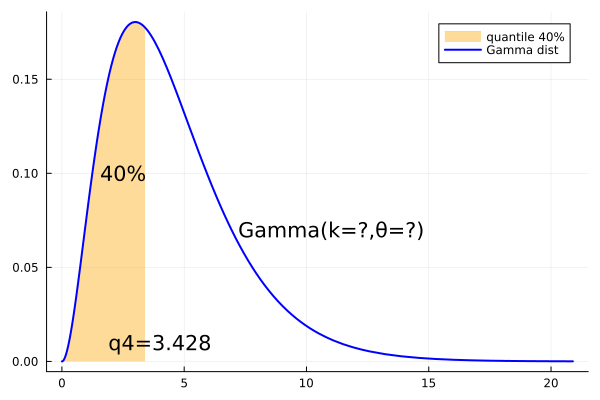

In [3]:
plot(0:0.1:q4, Gamma(3,1.5),fill=(0,0.4,:orange),lw=0,label="quantile 40%")
plot!(Gamma(3,1.5),lw=2,label="Gamma dist",color=:blue)
plot!(ann=[(4,0.01,"q4=$(round(q4,digits=3))"),(2.5,0.1,"40%"),(11,0.07,"Gamma(k=?,θ=?)")])

In [4]:
savefig("gamma-question.png")

"C:\\Users\\kimse\\OneDrive\\Jupyter_notebook\\北海道マラソンのタイム推計\\gamma-question.png"

In [5]:
@model function gdemo()
    m ~ InverseGamma(2,3)
    s ~ InverseGamma(2,3)
    dist = Gamma(m,s)
    
    y4 ~ Normal(quantile(dist,0.4),0.1)
    y2 ~ Normal(quantile(dist,0.2),0.1)
    
    y4 ~ Normal(q4,0.1)
    y2 ~ Normal(q2,0.1)
end   

c = sample(gdemo(),NUTS(),6000)

LoadError: MethodError: no method matching __gamma_inc_inv(::ForwardDiff.Dual{ForwardDiff.Tag{Turing.TuringTag, Float64}, Float64, 4}, ::ForwardDiff.Dual{ForwardDiff.Tag{Turing.TuringTag, Float64}, Float64, 4}, ::Bool)
[0mClosest candidates are:
[0m  __gamma_inc_inv([91m::T[39m, [91m::T[39m, ::Bool) where T<:Union{Float16, Float32} at C:\Users\kimse\.julia\packages\SpecialFunctions\hefUc\src\gamma_inc.jl:1089
[0m  __gamma_inc_inv([91m::Float64[39m, [91m::Float64[39m, ::Bool) at C:\Users\kimse\.julia\packages\SpecialFunctions\hefUc\src\gamma_inc.jl:1012

MethodError: no method matching __gamma_inc_inv(::ForwardDiff.Dual{ForwardDiff.Tag{Turing.TuringTag, Float64}, Float64, 4}, ::ForwardDiff.Dual{ForwardDiff.Tag{Turing.TuringTag, Float64}, Float64, 4}, ::Bool)
Closest candidates are:
  __gamma_inc_inv(::T, ::T, ::Bool) where T<:Union{Float16, Float32} at C:\Users\xxxxxx\.julia\packages\SpecialFunctions\hefUc\src\gamma_inc.jl:1089
  __gamma_inc_inv(::Float64, ::Float64, ::Bool) at C:\Users\xxxxxx\.julia\packages\SpecialFunctions\hefUc\src\gamma_inc.jl:1012

Stacktrace:....省略

In [7]:
using ForwardDiff,StatsFuns,SpecialFunctions
function SpecialFunctions.__gamma_inc_inv(a::ForwardDiff.Dual{T}, minpq::ForwardDiff.Dual{T}, pcase::Bool) where {T}
    
    v_a= ForwardDiff.value(a)
    v_pq = ForwardDiff.value(minpq)
    p_a = ForwardDiff.partials(a).values
    p_pq = ForwardDiff.partials(minpq).values

    SpecialFunctions.__gamma_inc_inv(v_a,v_pq,pcase)
end

In [8]:
@model function gdemo()
    m ~ InverseGamma(2,3)
    s ~ InverseGamma(2,3)
    dist = Gamma(m,s)
    
    y4 ~ Normal(quantile(dist,0.4),0.1)
    y2 ~ Normal(quantile(dist,0.2),0.1)
    
    y4 ~ Normal(q4,0.1) #q4 is a constance , 3.4276
    y2 ~ Normal(q2,0.1) #q2 is a constance , 2.3025
end   

c = sample(gdemo(),NUTS(),6000)

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\KOb5J\src\inference\hmc.jl:190
Sampling: 100%|█████████████████████████████████████████| Time: 0:01:15


Chains MCMC chain (6000×16×1 Array{Float64, 3}):

Iterations        = 1001:1:7000
Number of chains  = 1
Samples per chain = 6000
Wall duration     = 80.09 seconds
Compute duration  = 80.09 seconds
parameters        = m, s, y4, y2
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

           m    2.9913    0.7570     0.0098    0.0472   221.4870    1.0045     ⋯
           s    1.6474    0.5170     0.0067    0.0314   225.8288    1.0085     ⋯
          y4    3.4277    0.0973     0.0013    0.0049   371.3284    1.0059     ⋯
          y2    2.2889    0.0956     0.0012    0.0062   227.6503    1.0010     ⋯
                                                           

In [9]:
c4 = cdf(Gamma(3, 1.5),3.482)
c2 = cdf(Gamma(3, 1.5),2.3)
(c2,c4)

(0.19956583512797052, 0.40961042158376443)

In [10]:
@model function gdemo2()
    m ~ InverseGamma(2,3)
    s ~ InverseGamma(2,3)
    dist = Gamma(m,s)
    
    y4 ~ Normal(cdf(dist,3.382),0.1)
    y2 ~ Normal(cdf(dist,2.3),0.1)
    
    y4 ~ Normal(c4,0.1) #c4 is a constance , 0.409610
    y2 ~ Normal(c2,0.1) #c2 is a constance , 0.199565
end   

c2 = sample(gdemo2(),NUTS(),6000)

LoadError: MethodError: no method matching _gamma_inc(::ForwardDiff.Dual{ForwardDiff.Tag{Turing.TuringTag, Float64}, Float64, 4}, ::ForwardDiff.Dual{ForwardDiff.Tag{Turing.TuringTag, Float64}, Float64, 4}, ::Int64)
[0mClosest candidates are:
[0m  _gamma_inc([91m::Float64[39m, [91m::Float64[39m, ::Integer) at C:\Users\kimse\.julia\packages\SpecialFunctions\hefUc\src\gamma_inc.jl:860
[0m  _gamma_inc([91m::BigFloat[39m, [91m::BigFloat[39m, ::Integer) at C:\Users\kimse\.julia\packages\SpecialFunctions\hefUc\src\gamma_inc.jl:950
[0m  _gamma_inc([91m::Float32[39m, [91m::Float32[39m, ::Integer) at C:\Users\kimse\.julia\packages\SpecialFunctions\hefUc\src\gamma_inc.jl:956
[0m  ...

MethodError: no method matching _gamma_inc(::ForwardDiff.Dual{ForwardDiff.Tag{Turing.TuringTag, Float64}, Float64, 4}, ::ForwardDiff.Dual{ForwardDiff.Tag{Turing.TuringTag, Float64}, Float64, 4}, ::Int64)
Closest candidates are:
  _gamma_inc(::Float64, ::Float64, ::Integer) at C:\Users\kimse\.julia\packages\SpecialFunctions\hefUc\src\gamma_inc.jl:860
  _gamma_inc(::BigFloat, ::BigFloat, ::Integer) at C:\Users\kimse\.julia\packages\SpecialFunctions\hefUc\src\gamma_inc.jl:950
  _gamma_inc(::Float32, ::Float32, ::Integer) at C:\Users\kimse\.julia\packages\SpecialFunctions\hefUc\src\gamma_inc.jl:956
  ...

In [11]:
function SpecialFunctions._gamma_inc(a::ForwardDiff.Dual{T}, x::ForwardDiff.Dual{T}, ind::Integer) where {T}
    v_a= ForwardDiff.value(a)
    v_x = ForwardDiff.value(x)
    SpecialFunctions._gamma_inc(v_a,v_x,ind)
end

In [12]:
@model function gdemo2()
    m ~ InverseGamma(2,3)
    s ~ InverseGamma(2,3)
    dist = Gamma(m,s)
    
    y4 ~ Normal(cdf(dist,3.382),0.1)
    y2 ~ Normal(cdf(dist,2.3),0.1)
    
    y4 ~ Normal(c4,0.1) #c4 is a constance , 0.409610
    y2 ~ Normal(c2,0.1) #c2 is a constance , 0.199565
end   

c2 = sample(gdemo2(),NUTS(),6000)

LoadError: MethodError: no method matching Float64(::ForwardDiff.Dual{ForwardDiff.Tag{Turing.TuringTag, Float64}, Float64, 4})
[0mClosest candidates are:
[0m  (::Type{T})(::Real, [91m::RoundingMode[39m) where T<:AbstractFloat at rounding.jl:200
[0m  (::Type{T})(::T) where T<:Number at boot.jl:772
[0m  (::Type{T})([91m::AbstractChar[39m) where T<:Union{AbstractChar, Number} at char.jl:50
[0m  ...